In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(columns = 'Parch', axis = 1, inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,111369,30.0000,C148,C


In [4]:
df.drop(columns = 'Name', axis = 1, inplace = True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,111369,30.0000,C148,C


In [5]:
df.drop(columns = 'Ticket', axis = 1, inplace = True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,7.2500,NaN,S
1,2,1,1,female,38.0,1,71.2833,C85,C
2,3,1,3,female,26.0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,53.1000,C123,S
4,5,0,3,male,35.0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,23.4500,NaN,S
889,890,1,1,male,26.0,0,30.0000,C148,C


In [6]:
df.drop(columns = 'Cabin', axis = 1, inplace = True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,male,22.0,1,7.2500,S
1,2,1,1,female,38.0,1,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,1,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,13.0000,S
887,888,1,1,female,19.0,0,30.0000,S
888,889,0,3,female,NaN,1,23.4500,S
889,890,1,1,male,26.0,0,30.0000,C


In [7]:
df.drop(columns = 'Embarked', axis = 1, inplace = True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare
0,1,0,3,male,22.0,1,7.2500
1,2,1,1,female,38.0,1,71.2833
2,3,1,3,female,26.0,0,7.9250
3,4,1,1,female,35.0,1,53.1000
4,5,0,3,male,35.0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,13.0000
887,888,1,1,female,19.0,0,30.0000
888,889,0,3,female,NaN,1,23.4500
889,890,1,1,male,26.0,0,30.0000


In [16]:
df.drop(columns = 'PassengerId', axis = 1, inplace = True)
df

,Survived,Pclass,Sex,SibSp
0,0,3,male,1
1,1,1,female,1
2,1,3,female,0
3,1,1,female,1
4,0,3,male,0
...,...,...,...,...
886,0,2,male,0
887,1,1,female,0
888,0,3,female,1
889,1,1,male,0


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
df_clean = df.copy()
label_encoder = LabelEncoder()
df_clean['Sex']= label_encoder.fit_transform(df['Sex'])
df_clean

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare
0,1,0,3,1,22.0,1,7.2500
1,2,1,1,0,38.0,1,71.2833
2,3,1,3,0,26.0,0,7.9250
3,4,1,1,0,35.0,1,53.1000
4,5,0,3,1,35.0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,13.0000
887,888,1,1,0,19.0,0,30.0000
888,889,0,3,0,NaN,1,23.4500
889,890,1,1,1,26.0,0,30.0000


In [17]:
cols = df.columns.to_list()
cols.remove('Survived')
cols

['Pclass', 'Sex', 'SibSp']

In [22]:
features = df_clean[cols]
response = df_clean['Survived']

In [27]:
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.3, random_state = 0 )

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(random_state=0)

In [29]:
predictions = classifier.predict(features_test)
table = pd.DataFrame({'actual': response_test, 'predict': predictions})
table

,actual,predict
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
263,0,0
718,0,0
620,0,0
786,1,1


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(response_test, predictions)

0.7947761194029851

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(response_test, predictions)

array([[147,  21],
       [ 34,  66]], dtype=int64)

In [33]:
idx = ['actual 0', 'actual 1']

cm = pd.DataFrame(confusion_matrix(response_test, predictions),
                 columns = ['pred 0', 'pred 1'],
                 index = idx)
cm

,pred 0,pred 1
actual 0,147,21
actual 1,34,66


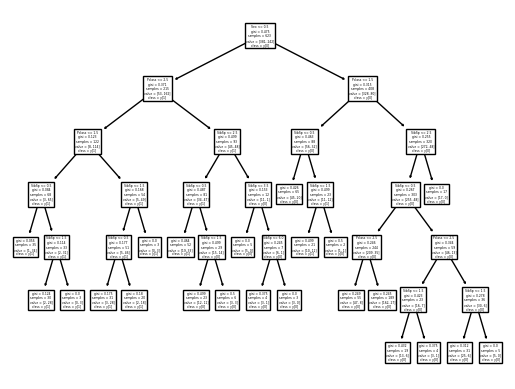

In [34]:
from sklearn.tree import plot_tree
decision_tree_plot = plot_tree(classifier, feature_names = cols, class_names = True)

In [36]:
importance = pd.DataFrame({'features':cols, 'importance': classifier.feature_importances_})
importance

,features,importance
0,Pclass,0.207366
1,Sex,0.713153
2,SibSp,0.079482
